In [11]:
# long-winded dense optical flow
import cv2 
import numpy as np

#rescale the window 
cv2.namedWindow('Resized Window', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Resized Window', 1120, 630)
cv2.namedWindow('dense optical flow', cv2.WINDOW_NORMAL)
cv2.resizeWindow('dense optical flow', 1120, 630)

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture("C:/Users/hucan/Videos/Captures/test.MOV")
# ret = a boolean return value from getting the frame, first_frame = the first frame in the entire video sequence
ret, first_frame = cap.read()
# Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally expensive
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
# Creates an image filled with zero intensities with the same dimensions as the frame
mask = np.zeros_like(first_frame)
# Sets image saturation to maximum
mask[..., 1] = 255

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Resized Window',frame)
        
        # Converts each frame to grayscale - we previously only converted the first frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Calculates dense optical flow by Farneback method
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        # Updates previous frame
        
        # Computes the magnitude and angle of the 2D vectors
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        # Sets image hue according to the optical flow direction
        mask[..., 0] = angle * 180 / np.pi / 2
        # Sets image value according to the optical flow magnitude (normalized)
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        # Converts HSV to RGB (BGR) color representation
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
        # Opens a new window and displays the output frame
        cv2.imshow("dense optical flow", rgb)
    
        prev_gray = gray
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    # Break the loop
    else: 
        break

# When everything done, release the video capture object
cap.release()
# Closes all the frames
cv2.destroyAllWindows()



In [1]:
# sparse optical flow (entire video)
import numpy as np
import cv2
cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
cv2.resizeWindow('frame', 800, 450)

cap = cv2.VideoCapture("C:/Users/hucan/Videos/Captures/test5.MOV")

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(50) & 0xff
    if k == ord('q'):
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cv2.destroyAllWindows()
cap.release()

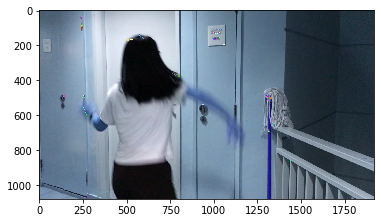

In [2]:
# sparse optical flow (one frame)
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

cap = cv2.VideoCapture("C:/Users/hucan/Videos/Captures/test5.MOV")

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)


ret,frame = cap.read()
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# calculate optical flow
p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

# Select good points
good_new = p1[st==1]
good_old = p0[st==1]

# draw the tracks
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
    frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
img = cv2.add(frame,mask)

plt.imshow(img)
    


In [4]:
#dense optical flow
import cv2
import numpy as np
cv2.namedWindow('frame2', cv2.WINDOW_NORMAL)
cv2.resizeWindow('frame2', 1120, 630)

cap = cv2.VideoCapture("C:/Users/hucan/Videos/Captures/IMG_0809.MOV")

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2',rgb)
    k = cv2.waitKey(30) & 0xff
    if k == ord('q'):
        break
    elif k == ord('s'):
        cv2.imwrite('C:/Users/hucan/Videos/Captures/frame2.png',frame2)
        cv2.imwrite('C:/Users/hucan/Videos/Captures/rgh.png',rgb)
    prvs = next

cap.release()
cv2.destroyAllWindows()

In [1]:
#dense optical flow (one frame)
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cap = cv2.VideoCapture("C:/Users/hucan/Videos/Captures/test5.MOV")

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255


ret, frame2 = cap.read()
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

#plt.imshow(rgb)
    
print(flow)


[[[ 8.87859240e-03  6.90621231e-03]
  [ 1.71043761e-02  1.31493798e-02]
  [ 2.21330989e-02  1.50276553e-02]
  ...
  [ 1.64341122e-01 -6.06983807e-03]
  [ 1.13849089e-01 -3.12248194e-05]
  [ 7.62136653e-02  4.39188443e-03]]

 [[ 2.28876192e-02  1.68925114e-02]
  [ 3.72073427e-02  2.52086259e-02]
  [ 4.43962030e-02  2.63543259e-02]
  ...
  [ 1.96627527e-01 -2.82182582e-02]
  [ 1.37083590e-01 -1.65396277e-02]
  [ 9.35631618e-02 -7.69968610e-03]]

 [[ 3.67430151e-02  3.52243558e-02]
  [ 5.45697324e-02  4.63839322e-02]
  [ 5.93013652e-02  4.77868058e-02]
  ...
  [ 2.50539780e-01 -2.96382755e-02]
  [ 1.75141349e-01 -2.23949533e-02]
  [ 1.19186051e-01 -1.64203402e-02]]

 ...

 [[ 4.70517762e-03 -2.67827557e-03]
  [ 6.56523556e-03 -6.18153904e-03]
  [ 8.21592659e-03 -8.07884894e-03]
  ...
  [ 1.70778811e-01  3.78630795e-02]
  [ 1.42472580e-01  3.30905057e-02]
  [ 1.18799321e-01  2.83428840e-02]]

 [[ 2.12594680e-03 -1.20129308e-03]
  [ 3.27647151e-03 -3.11519252e-03]
  [ 4.07694420e-03 -4.3939

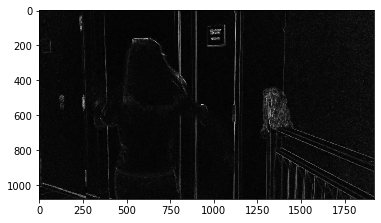

In [27]:
# edge detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

cap = cv2.VideoCapture("C:/Users/hucan/Videos/Captures/test5.MOV")
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
ret, frame2 = cap.read()
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

sobel_64 = cv2.Sobel(prvs,cv2.CV_64F,0,1,ksize=3)
abs_64 = np.absolute(sobel_64)
sobel_8u = np.uint8(abs_64)

blur = cv2.GaussianBlur(prvs,(3,3),0)
dst = cv2.Laplacian(blur,cv2.CV_16S,ksize=3)
laplacian = cv2.convertScaleAbs(dst)

canny = cv2.Canny(prvs,50,150)

kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(laplacian, cv2.MORPH_CLOSE, kernel)

plt.imshow (closing,cmap='gray')

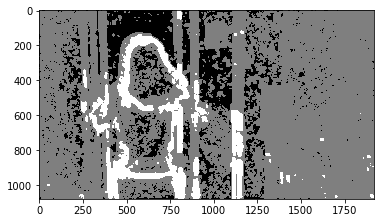

In [3]:
# classification 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

cap = cv2.VideoCapture("C:/Users/hucan/Videos/Captures/test5.MOV")
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
ret, frame2 = cap.read()
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# mask for pixels whose motion we are unsure of
vector_length = np.linalg.norm(flow,axis=2)
mask_idk=vector_length<0.05

# calculate camera motion from filtered pixels = (xedges[x_index],yedges[y_index])                         
flow_pruned=flow[mask_idk]
x=flow_pruned[:,0].flatten()
y=flow_pruned[:,1].flatten()


xedges=[]
i=x.min()
while i <= x.max():
    xedges.append(i)
    i+=(x.max()-x.min())/100 # set the number of bins to be 100
xedges=np.array(xedges)

yedges=[]
i=y.min()
while i <= y.max():
    yedges.append(i)
    i+=(y.max()-y.min())/100
yedges=np.array(yedges)


H,xedges,yedges=np.histogram2d(x, y,bins=(xedges,yedges))
idx = list(H.flatten()).index(H.max()) #get 1D index
x_idx, y_idx = idx // H.shape[1], idx % H.shape[1] #get 2D index


# mask for pixels belong to camera motion
vector_camera=sqrt(xedges[x_idx]**2 + yedges[y_idx]**2)
uncertainty=vector_camera*16086+5.4526
#uncertainty=4
mask_camera=(vector_length > vector_camera - uncertainty) & (vector_length < vector_camera + uncertainty) & (vector_length > 0.05)#pixels in the range of camera motion & not belong to idk


# mask for pixels belong to object motion (pixels unclassified)
mask_object=np.logical_or(mask_idk,mask_camera)
mask_object=~mask_object #get opposite value


# display classification of three types of pixels
prvs[mask_idk]=0
prvs[mask_camera]=127
prvs[mask_object]=255
plt.imshow(prvs, cmap="gray")

In [ ]:
# function morphology is seperated 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt  

cap = cv2.VideoCapture("C:/Users/hucan/Videos/Captures/IMG_0952.MOV")
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
ret, frame2 = cap.read()
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

def mask_idk(flow):# mask for pixels whose motion we are unsure of
    vector_length = np.linalg.norm(flow,axis=2)
    mask=vector_length<0.05
    return mask

def edges(array,bins):
    edges=[]
    i=array.min()
    while i <= array.max():
        edges.append(i)
        i+=(array.max()-array.min())/bins # set the number of bins to be 100
    edges=np.array(edges)
    return edges
                          
def calCameraMotion (flow):
    # calculate camera motion from filtered pixels
    mask1=mask_idk(flow)
    flow_pruned=flow[mask1]
    
    # 2D Histogram 
    x=flow_pruned[:,0].flatten()
    y=flow_pruned[:,1].flatten()
    xedges=edges(x,100)
    yedges=edges(y,100)
    
    H,xedges,yedges=np.histogram2d(x, y,bins=(xedges,yedges))
    idx = list(H.flatten()).index(H.max()) #get 1D index
    x_idx, y_idx = idx // H.shape[1], idx % H.shape[1] #get 2D index
    
    return xedges[x_idx],yedges[y_idx]

def mask_camera(flow):
    dx,dy=calCameraMotion(flow)
    vector_camera=sqrt(dx**2 + dy**2)
    vector_length = np.linalg.norm(flow,axis=2)
    uncertainty=vector_camera*16086+5.4526 #relationship determined through experimentation 
    mask=(vector_length > vector_camera - uncertainty) & (vector_length < vector_camera + uncertainty) & (vector_length > 0.05)#pixels in the range of camera motion & not belong to idk
    return mask

def mask_object(flow): #pixels unclassified 
    mask1=mask_idk(flow)
    mask2=mask_camera(flow)
    mask_object=np.logical_or(mask1,mask2)
    mask_object=~mask_object #get opposite value
    return mask_object

def imageMorphology(img):
    kernel = np.ones((40,40),np.uint8)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) #dilation followed by erosion 
    return closing

def boundingBox(img):
    thresh=img
    #ret,thresh = cv2.threshold(img,128,255,0) <--no need as prvs is alr a binary image 
    contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    minArea=60*60
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        area = cv2.contourArea(cnt)
        if area > minArea:
            frame_box= cv2.rectangle(frame1, (x,y),(x+w,y+h), (0,255,0), 5)
    return frame_box
    
mask_object=mask_object(flow)
prvs[~mask_object]=0
prvs[mask_object]=255
img_closing=imageMorphology(prvs)
img_box=boundingBox(img_closing)

plt.imshow(img_closing,cmap="gray")


In [ ]:
# feature descriptor 

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt  

def mask_idk(flow):# mask for pixels whose motion we are unsure of
    vector_length = np.linalg.norm(flow,axis=2)
    mask=vector_length<0.05
    return mask

def edges(array,bins):
    edges=[]
    i=array.min()
    while i <= array.max():
        edges.append(i)
        i+=(array.max()-array.min())/bins # set the number of bins to be 100
    edges=np.array(edges)
    return edges
                          
def calCameraMotion (flow):
    # calculate camera motion from filtered pixels
    mask1=mask_idk(flow)
    flow_pruned=flow[mask1]
    
    # 2D Histogram 
    x=flow_pruned[:,0].flatten()
    y=flow_pruned[:,1].flatten()
    xedges=edges(x,100)
    yedges=edges(y,100)
    
    H,xedges,yedges=np.histogram2d(x, y,bins=(xedges,yedges))
    idx = list(H.flatten()).index(H.max()) #get 1D index
    x_idx, y_idx = idx // H.shape[1], idx % H.shape[1] #get 2D index
    
    return xedges[x_idx],yedges[y_idx]

def mask_camera(flow):
    dx,dy=calCameraMotion(flow)
    vector_camera=sqrt(dx**2 + dy**2)
    vector_length = np.linalg.norm(flow,axis=2)
    uncertainty=vector_camera*16086+5.4526 #relationship determined through experimentation 
    mask=(vector_length > vector_camera - uncertainty) & (vector_length < vector_camera + uncertainty) & (vector_length > 0.05)#pixels in the range of camera motion & not belong to idk
    return mask

def mask_object(flow): #pixels unclassified 
    mask1=mask_idk(flow)
    mask2=mask_camera(flow)
    mask_object=np.logical_or(mask1,mask2)
    mask_object=~mask_object #get opposite value
    return mask_object

def imageMorphology(img):
    kernel = np.ones((40,40),np.uint8)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) #dilation followed by erosion 
    return closing

def boundingBox(img,frame,background): 
    thresh=imageMorphology(img)
    #ret,thresh = cv2.threshold(img,128,255,0) <--no need as prvs is alr a binary image 
    contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    minArea=60*60

    frame_box=frame
    stencil = np.zeros(background.shape).astype(background.dtype)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        area = cv2.contourArea(cnt)
        if area > minArea:
            frame_box= cv2.rectangle(frame, (x,y),(x+w,y+h), (0,255,0), 5)
            box_countours=[np.array([[x,y],[x+w,y],[x+w,y+h],[x,y+h]])]
            cv2.fillPoly(stencil, box_countours, [255,255,255])
    result = cv2.bitwise_and(background, stencil) 
    return frame_box,result

def IoU (x,y):
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def featureDescriptor (img): # coloured
    resized = cv2.resize (img, (64,128))
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=1) # 32F or 64F ?
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True) 
    
    xedges = np.array ([0,20,40,60,80,100,120,140,160])
    yedges = 
    H = np.histogram2d(x, y,bins=(xedges,yedges))
        
def main():
    cv2.namedWindow('Video', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Video', 1120, 630)

    cap = cv2.VideoCapture("C:/Users/hucan/Videos/Captures/IMG_0952.MOV")
    ret, frame1 = cap.read()
    prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    
    background=cv2.imread ("C:/Users/hucan/OneDrive/Pictures/Screenshots/background.png",0) 
    box_result1 = background 

    while(1):
        ret, frame2 = cap.read()
        next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        maskObject = mask_object(flow)
        temp=prvs
        temp[~maskObject]=0
        temp[maskObject]=255
        img, box_result2=boundingBox(temp,frame1,background) 
        
        iou_score = IoU (box_result1, box_result2)
        if iou_score > 0.7:
            cv2.imshow('Video',img)
        else:
            cv2.imshow('Video',frame2)
        
        k = cv2.waitKey(30) & 0xff
        if k == ord('q'):
            break
       
        prvs = next
        frame1=frame2
        box_result1=box_result2

    cap.release()
    cv2.destroyAllWindows()
    
main()
